In [70]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os
import seaborn as sns

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')



In [2]:
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
def check_value_counts(data):
    data_keys = data.keys()
    
    for key in data_keys:
        print(key)
        print(data[key].value_counts())
        print('----------------------------')


In [9]:
def check_missing_values(data):
    print(data.isnull().sum())

In [28]:
#Missing Values in Training
check_missing_values(train)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64


In [11]:
#Missing Values in Test
check_missing_values(test)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [29]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [180]:
Id= test['Loan_ID']

In [18]:
check_value_counts(train)

Loan_ID
LP001754    1
LP001507    1
LP002692    1
LP002446    1
LP001841    1
LP002588    1
LP002714    1
LP002472    1
LP001267    1
LP002832    1
LP001046    1
LP002407    1
LP001904    1
LP002600    1
LP001715    1
LP001914    1
LP001487    1
LP001586    1
LP002545    1
LP002560    1
LP001702    1
LP002928    1
LP001536    1
LP001146    1
LP001788    1
LP002717    1
LP001636    1
LP001674    1
LP001273    1
LP001800    1
           ..
LP002501    1
LP001491    1
LP001120    1
LP001843    1
LP001562    1
LP001109    1
LP001469    1
LP002958    1
LP002318    1
LP001875    1
LP001610    1
LP001994    1
LP002586    1
LP002936    1
LP002933    1
LP002863    1
LP002287    1
LP002945    1
LP002530    1
LP002281    1
LP002055    1
LP001207    1
LP001266    1
LP001647    1
LP002637    1
LP002418    1
LP002002    1
LP001947    1
LP001864    1
LP001228    1
Name: Loan_ID, Length: 614, dtype: int64
----------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
------

In [19]:
check_value_counts(test)

Loan_ID
LP001737    1
LP001527    1
LP002394    1
LP001909    1
LP002059    1
LP001135    1
LP002735    1
LP002920    1
LP001663    1
LP001121    1
LP002306    1
LP002355    1
LP002975    1
LP002878    1
LP002899    1
LP002264    1
LP002270    1
LP002609    1
LP001347    1
LP002485    1
LP001332    1
LP001094    1
LP001950    1
LP001231    1
LP002208    1
LP002962    1
LP001359    1
LP001368    1
LP002420    1
LP002016    1
           ..
LP002592    1
LP002605    1
LP001703    1
LP001827    1
LP002325    1
LP002333    1
LP002568    1
LP001867    1
LP002553    1
LP001208    1
LP002630    1
LP002793    1
LP002612    1
LP002971    1
LP001163    1
LP001015    1
LP002766    1
LP001219    1
LP002867    1
LP002825    1
LP001450    1
LP001082    1
LP001547    1
LP001366    1
LP002070    1
LP001995    1
LP001419    1
LP001486    1
LP002644    1
LP001483    1
Name: Loan_ID, Length: 367, dtype: int64
----------------------------
Gender
Male      286
Female     70
Name: Gender, dtype: int64
------

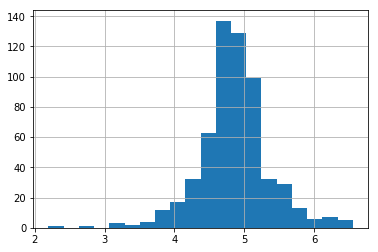

In [26]:
#Trying Log Transformation on Loan Amount to see if that can handle outliers
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


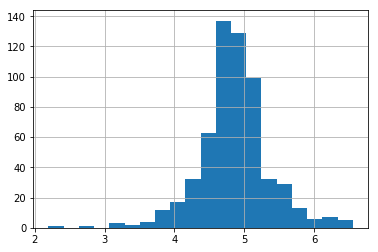

In [27]:
#checking ApplicantIncome - see if combining applicant and co applicant income Combination yeild a better feature,
# taking log of that we kind of get a normal distribution so thats good ?? hopefully 
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20) 

In [20]:
#Function for Drawing Correlation Matrix
def correlationDraw(data,subFeature,mainFeature):
    
    correlation = data.loc[:,subFeature]
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation[mainFeature] = data[mainFeature]

    correlationData = correlation.corr()
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlationData,vmin=-1,vmax=1)
    
    for(i,j),val in np.ndenumerate(correlationData):
        ax.text(j,i,'{:0.1f}'.format(val),ha='center',va='center')
    
    ticks = np.arange(0,len(subFeature)+1,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    ax.set_xticklabels(subFeature+mainFeature)
    ax.set_yticklabels(subFeature+mainFeature)

    plt.show()

In [41]:
#Data Cleaning/Feature Engineering
def preProcessingData(data,feature_columns):
    data = data[feature_columns]
    #Filling Na Loan Amount with mean
    data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
    #Filling Na Self_Employed with No since that is the majority
    data['Self_Employed'].fillna('No',inplace=True)
    #Replacing Na in Gender, Married, Dependents, Loan Amount term , Credit History with values that occur the most i.e. mode
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
    data['Married'].fillna(data['Married'].mode()[0], inplace=True)
    data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
    
    #Trying Log Transformation on Loan Amount to see if that can handle outliers
    data['LoanAmount_log'] = np.log(data['LoanAmount'])
    #checking ApplicantIncome - see if combining applicant and co applicant income Combination yeild a better feature,
    # taking log of that we kind of get a normal distribution so thats good ?? hopefully 
    data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['TotalIncome_log'] = np.log(data['TotalIncome'])

    
    return data

In [111]:
#Reading Training, Test Data, separating target variable from training, then cleaning and preprocessing data for ML 
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
TargetLabel = train_data['Loan_Status']
feature_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 
                   'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 
                   'Credit_History', 'Property_Area']
#calling the data cleaning function
preprocessed_test_data = preProcessingData(test_data,feature_columns)
preprocessed_train_data = preProcessingData(train_data,feature_columns)

merged_data = pd.concat([preprocessed_train_data,preprocessed_test_data])




/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [112]:
merged_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760,6000.0,8.699515


In [82]:
#check null values - No null Values, table ready for ML 
check_missing_values(merged_data)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64


In [48]:
check_value_counts(merged_data)

Loan_ID
LP001466    1
LP002319    1
LP002753    1
LP001367    1
LP001531    1
LP002375    1
LP002639    1
LP002652    1
LP002301    1
LP002768    1
LP002398    1
LP002494    1
LP002643    1
LP001237    1
LP001174    1
LP001565    1
LP002767    1
LP002566    1
LP001718    1
LP001400    1
LP001231    1
LP002945    1
LP002554    1
LP002485    1
LP002281    1
LP002055    1
LP001207    1
LP002958    1
LP001647    1
LP002911    1
           ..
LP002544    1
LP001518    1
LP002823    1
LP002399    1
LP001317    1
LP001348    1
LP002262    1
LP001413    1
LP002229    1
LP002370    1
LP002362    1
LP002965    1
LP002581    1
LP002775    1
LP001263    1
LP002515    1
LP002099    1
LP002209    1
LP001046    1
LP001124    1
LP002087    1
LP001536    1
LP001900    1
LP002803    1
LP002717    1
LP001815    1
LP002593    1
LP001405    1
LP001827    1
LP001894    1
Name: Loan_ID, Length: 981, dtype: int64
----------------------------
Gender
Male      799
Female    182
Name: Gender, dtype: int64
------

In [134]:
columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 
                  'LoanAmount_log','LoanAmount_log','Loan_Amount_Term', 
                   'Credit_History', 'Property_Area'] # Declare the columns names
dataset = merged_data 
df = pd.DataFrame(dataset, columns=columns) # load the dataset as a pandas data frame
y = train_data.Loan_Status # define the target variable (dependent variable) as y

In [160]:
Numerical_merged_data = pd.get_dummies(merged_data)
processed_train_data = Numerical_merged_data.iloc[:preprocessed_train_data.shape[0],:]
processed_test_dataprocessed_test_data = Numerical_merged_data.iloc[preprocessed_train_data.shape[0]:,:]


In [114]:
y=train_data['Loan_Status']

In [173]:
processed_test_data.head()


,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,4.700480,8.651724,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,360.0,1.0,4.836282,8.428581,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,360.0,1.0,5.337538,8.824678,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,360.0,1.0,4.605170,8.494129,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,360.0,1.0,4.356709,8.094378,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(processed_train_data, y, test_size=0.2)
print( X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)



(491, 19) (491,)
(123, 19) (123,)


In [147]:
X_train.head()

,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
45,360.0,1.0,4.477337,8.134468,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
463,360.0,1.0,4.882802,8.554682,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
176,360.0,1.0,4.615121,8.206311,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
213,360.0,1.0,4.867534,8.648748,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
16,240.0,1.0,4.605170,8.187577,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [148]:
# Model evaluation- we first select few models and using cross validation we evaluate model accuracy by getting the 
# mean accuracy of each model. We can then use the best model to make prediction on Test data. 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.810735 (0.054851)
LDA: 0.806694 (0.055535)
KNN: 0.704653 (0.047796)
CART: 0.706735 (0.081664)
NB: 0.790367 (0.050856)
SVM: 0.782327 (0.070081)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Random Forest: 0.780163 (0.045579)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [182]:
lr = LogisticRegression() 
lr.fit(X_train, Y_train)  
prediction = lr.predict(X_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

0.8211382113821138
[[18 19]
 [ 3 83]]
              precision    recall  f1-score   support

           N       0.86      0.49      0.62        37
           Y       0.81      0.97      0.88        86

   micro avg       0.82      0.82      0.82       123
   macro avg       0.84      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


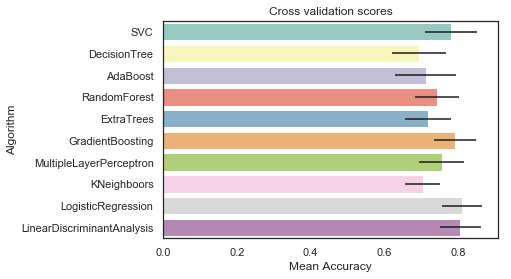

In [150]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [151]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.4s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [152]:
gsadaDTC.best_score_

0.725050916496945

In [153]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.3min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8065173116089613

In [154]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.4min finished


0.8044806517311609

In [155]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   23.2s finished


0.6843177189409368

In [156]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   10.8s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7983706720977597

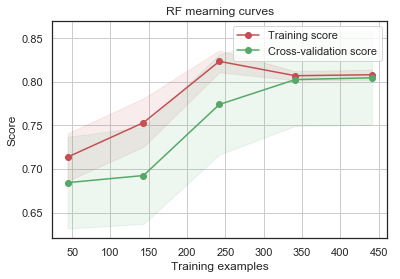

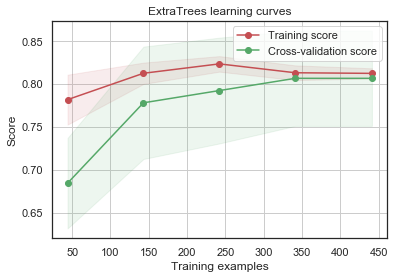

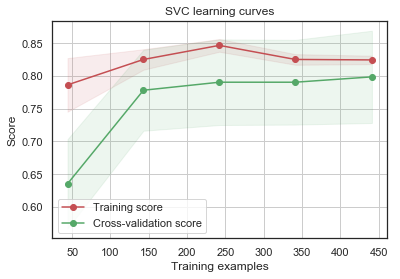

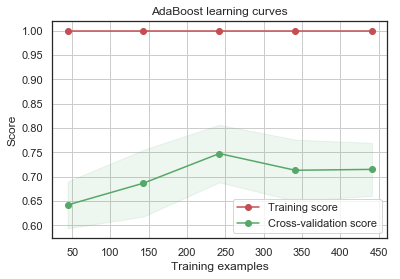

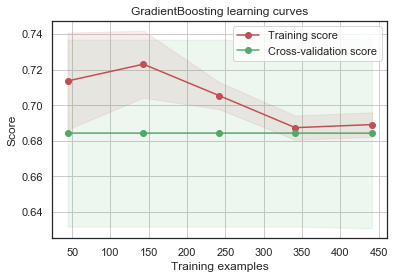

In [157]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)


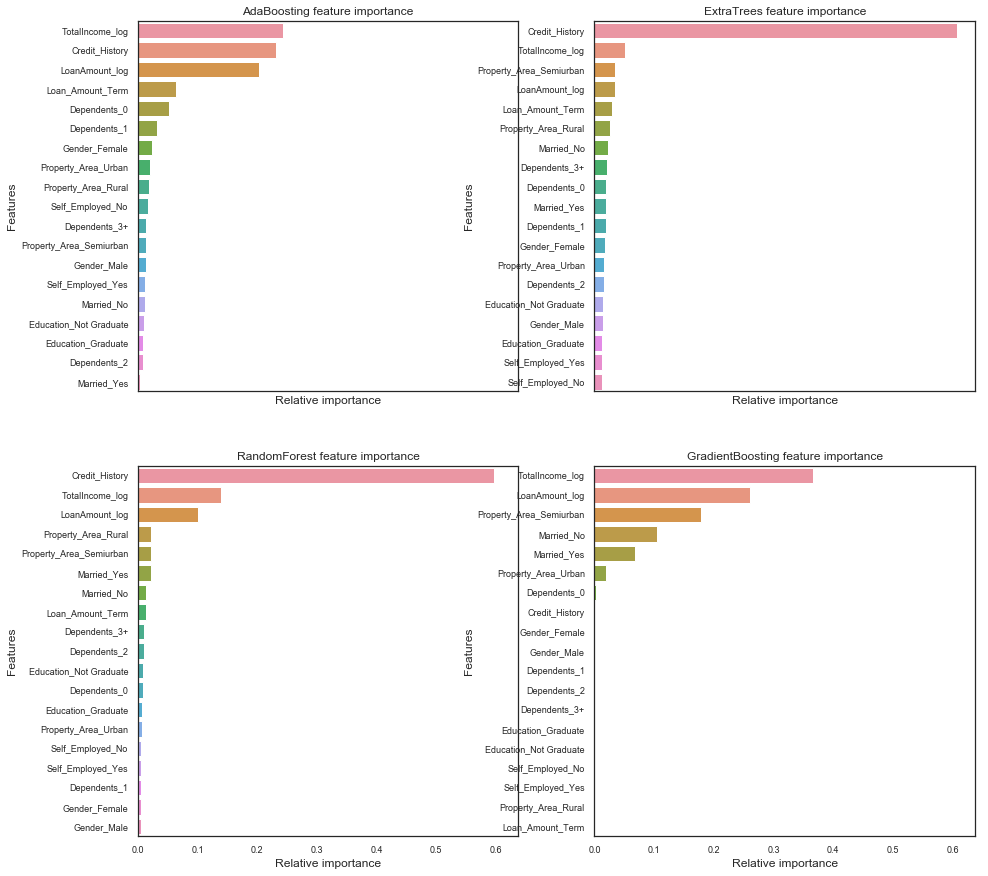

In [158]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [174]:
test_loan_RFC = pd.Series(RFC_best.predict(processed_test_data), name="RFC")
test_loan_ExtC = pd.Series(ExtC_best.predict(processed_test_data), name="ExtC")
test_loan_SVMC = pd.Series(SVMC_best.predict(processed_test_data), name="SVC")
test_loan_AdaC = pd.Series(ada_best.predict(processed_test_data), name="Ada")
test_loan_GBC = pd.Series(GBC_best.predict(processed_test_data), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_loan_RFC,test_loan_ExtC,test_loan_SVMC,test_loan_AdaC, test_loan_GBC],axis=1)




In [175]:
ensemble_results

,RFC,ExtC,SVC,Ada,GBC
0,Y,Y,Y,Y,Y
1,Y,Y,Y,N,Y
2,Y,Y,Y,Y,Y
3,Y,Y,Y,N,Y
4,Y,Y,Y,Y,Y
5,Y,Y,Y,Y,Y
6,Y,Y,Y,N,Y
7,N,N,N,N,N
8,Y,Y,Y,Y,Y
9,Y,Y,Y,Y,Y


In [176]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [181]:
test_loan = pd.Series(votingC.predict(processed_test_data), name="Loan_Status")

results = pd.concat([Id,test_loan],axis=1)

results.to_csv("submission3.csv",index=False)